In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import optuna

import warnings
warnings.filterwarnings('ignore')

# EDA

In [136]:
df = pd.read_csv('/Users/maksimtrebusinin/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [138]:
df.select_dtypes(['int','float']).describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [139]:
for col in df.select_dtypes('object'):
    print(f'{col} - {df[col].nunique()} unique values')

customerID - 7043 unique values
gender - 2 unique values
Partner - 2 unique values
Dependents - 2 unique values
PhoneService - 2 unique values
MultipleLines - 3 unique values
InternetService - 3 unique values
OnlineSecurity - 3 unique values
OnlineBackup - 3 unique values
DeviceProtection - 3 unique values
TechSupport - 3 unique values
StreamingTV - 3 unique values
StreamingMovies - 3 unique values
Contract - 3 unique values
PaperlessBilling - 2 unique values
PaymentMethod - 4 unique values
TotalCharges - 6531 unique values
Churn - 2 unique values


In [140]:
df.duplicated().sum()

0

In [141]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [142]:
for col in df.select_dtypes('object'):
    print(f'{col} - {df[col][0]}')

customerID - 7590-VHVEG
gender - Female
Partner - Yes
Dependents - No
PhoneService - No
MultipleLines - No phone service
InternetService - DSL
OnlineSecurity - No
OnlineBackup - Yes
DeviceProtection - No
TechSupport - No
StreamingTV - No
StreamingMovies - No
Contract - Month-to-month
PaperlessBilling - Yes
PaymentMethod - Electronic check
TotalCharges - 29.85
Churn - No


In [143]:
df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [144]:
prom_data = []
for el in df.TotalCharges:
    if isinstance(el, str) and el != ' ':
        prom_data.append(float(el))
    else:
        prom_data.append(np.nan)
if len(prom_data) == len(df):
    df['TotalCharges'] = prom_data
    df.dropna(inplace=True)
    X,y = df.drop('Churn', axis=1), df.Churn
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=42)
else:
    raise ValueError('Invalid Length')

In [150]:
data = X_test.copy()
data['Churn'] = y_test

data.to_json('input.json', orient='records', force_ascii=False, indent=4)

In [148]:
print(f'Length of X_train: {len(X_train)}\nLength of X_test: {len(X_test)}')

Length of X_train: 5062
Length of X_test: 704


In [149]:
for col in X_test.select_dtypes('object'):
    print(f'X_train: {(col, X_train[col].nunique())}\nX_test: {(col, X_test[col].nunique())}')

X_train: ('customerID', 5062)
X_test: ('customerID', 704)
X_train: ('gender', 2)
X_test: ('gender', 2)
X_train: ('Partner', 2)
X_test: ('Partner', 2)
X_train: ('Dependents', 2)
X_test: ('Dependents', 2)
X_train: ('PhoneService', 2)
X_test: ('PhoneService', 2)
X_train: ('MultipleLines', 3)
X_test: ('MultipleLines', 3)
X_train: ('InternetService', 3)
X_test: ('InternetService', 3)
X_train: ('OnlineSecurity', 3)
X_test: ('OnlineSecurity', 3)
X_train: ('OnlineBackup', 3)
X_test: ('OnlineBackup', 3)
X_train: ('DeviceProtection', 3)
X_test: ('DeviceProtection', 3)
X_train: ('TechSupport', 3)
X_test: ('TechSupport', 3)
X_train: ('StreamingTV', 3)
X_test: ('StreamingTV', 3)
X_train: ('StreamingMovies', 3)
X_test: ('StreamingMovies', 3)
X_train: ('Contract', 3)
X_test: ('Contract', 3)
X_train: ('PaperlessBilling', 2)
X_test: ('PaperlessBilling', 2)
X_train: ('PaymentMethod', 4)
X_test: ('PaymentMethod', 4)


In [151]:
for col in X_train.select_dtypes('object').columns:
    X_train[col] = LabelEncoder().fit_transform(X_train[col])
    X_val[col] = LabelEncoder().fit_transform(X_val[col])
    X_test[col] = LabelEncoder().fit_transform(X_test[col])
y_val = LabelEncoder().fit_transform(y_val)
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

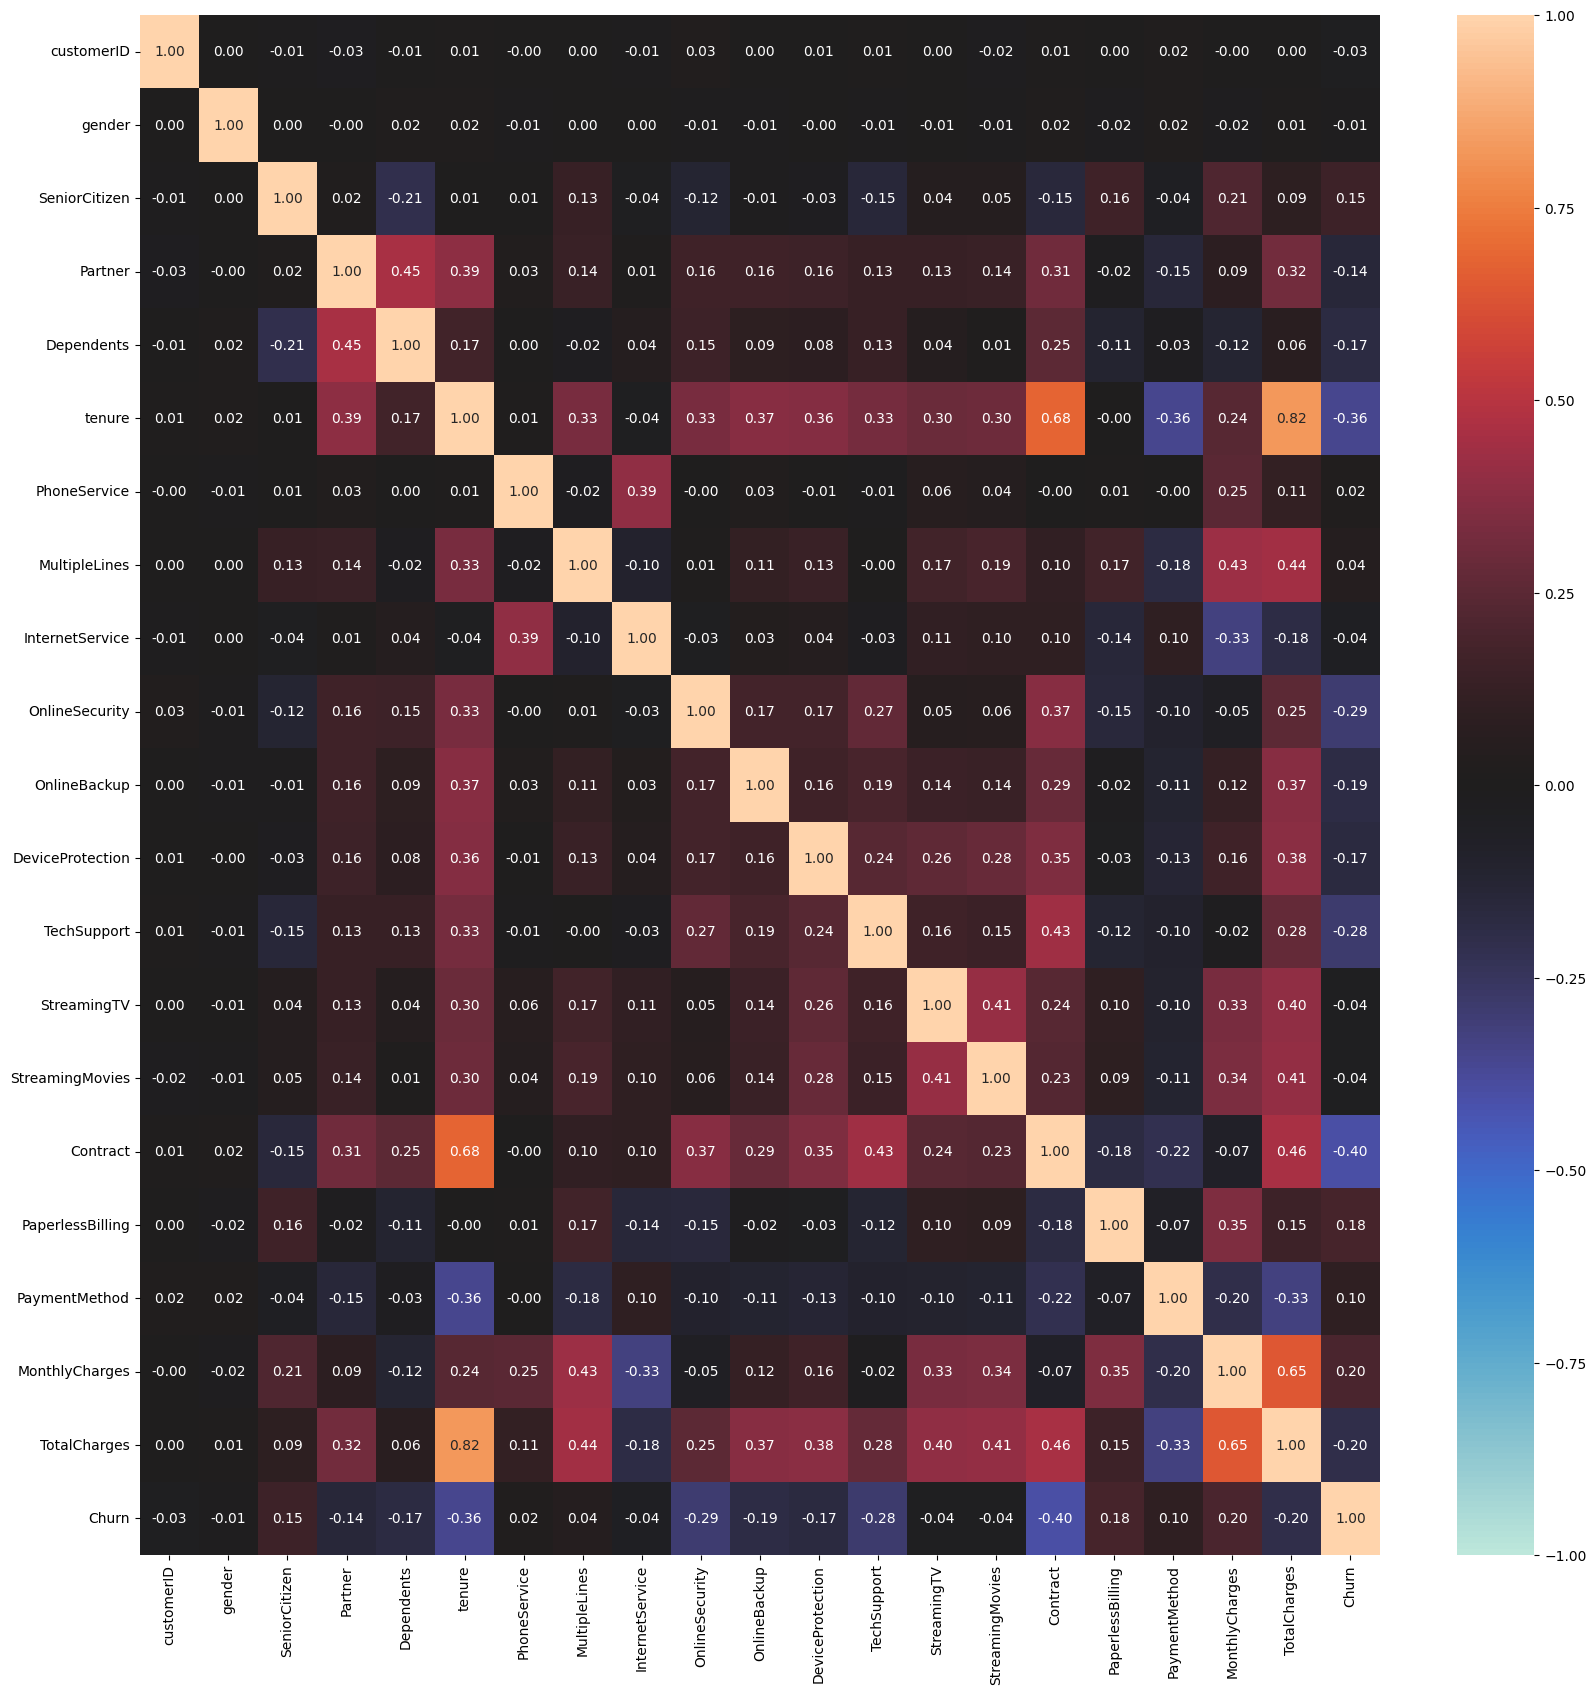

In [96]:
data = X_train.copy()
data['Churn'] = y_train
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, vmin=-1, center=0, vmax=1, fmt = '.2f')
plt.show()

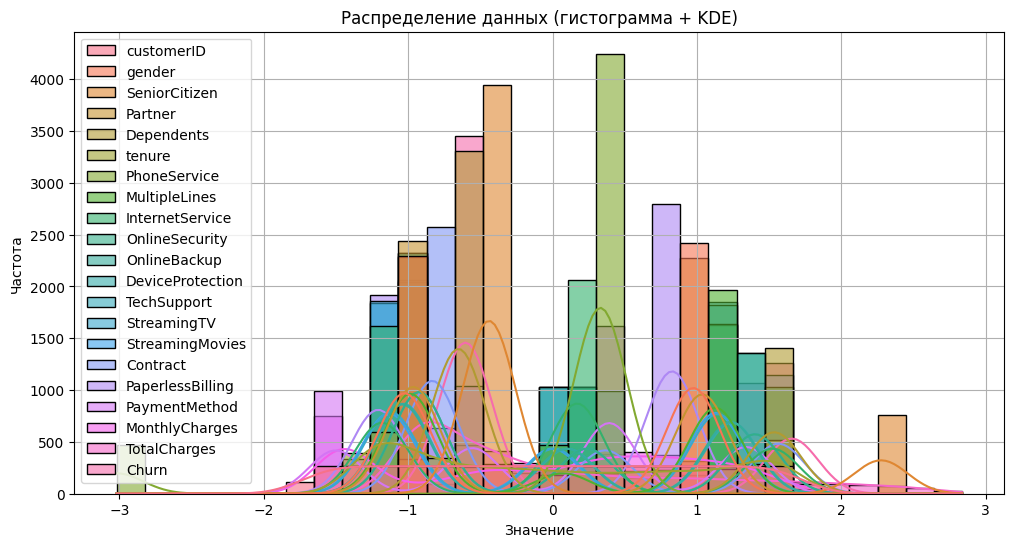

In [99]:
st = StandardScaler()
st.fit(data)
st_data = pd.DataFrame(data = st.transform(data), columns=data.columns)


plt.figure(figsize=(12, 6))
sns.histplot(st_data, kde=True, bins=30, color='blue', alpha=0.6)
plt.title('Распределение данных (гистограмма + KDE)')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

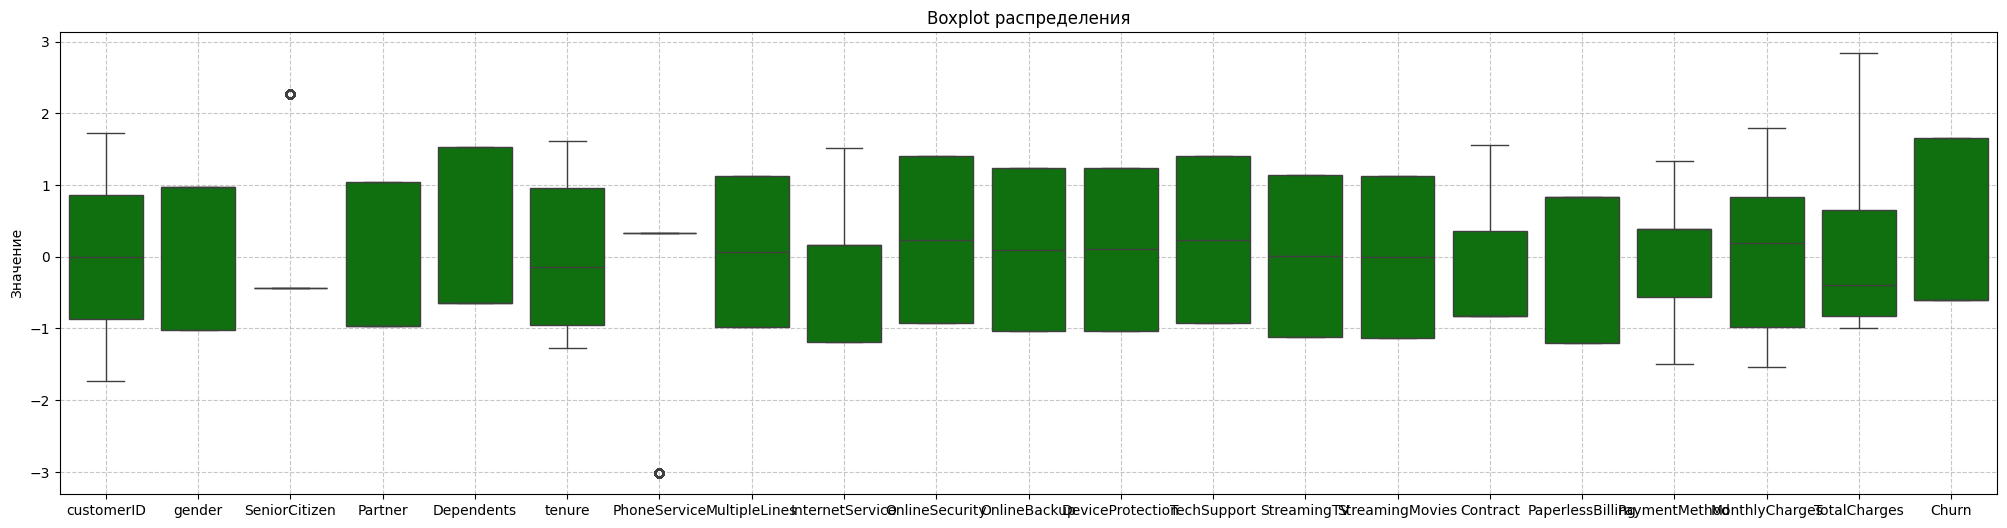

In [104]:
plt.figure(figsize=(25, 6))
sns.boxplot(st_data, color='green')
plt.title('Boxplot распределения')
plt.ylabel('Значение')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [111]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train,y_train)
print(np.bincount(y_res))

[3452 3641]


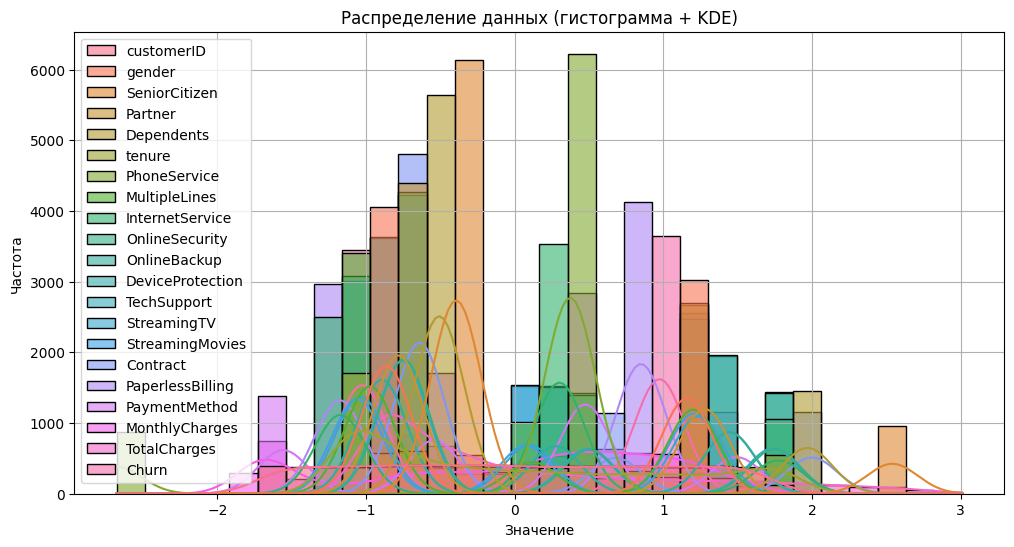

In [114]:
nw_data = X_res.copy()
nw_data['Churn'] = y_res
st = StandardScaler()
st.fit(nw_data)
st_data = pd.DataFrame(data = st.transform(nw_data), columns=data.columns)


plt.figure(figsize=(12, 6))
sns.histplot(st_data, kde=True, bins=30, color='blue', alpha=0.6)
plt.title('Распределение данных (гистограмма + KDE)')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Tuning models

In [124]:
dict_of_models = {'RandomForest': RandomForestClassifier(), 'XGBoost': XGBClassifier(), 'CatBoost': CatBoostClassifier(verbose = 0)}
for key, model in dict_of_models.items():
    md1 = model
    md1.fit(X_train,y_train)
    print(f'Accuarcy_score_{key}: {accuracy_score(y_test, md1.predict(X_test))}\nF1_score_{key}: {f1_score(y_test, md1.predict(X_test))}\nROC_AUC_{key}: {roc_auc_score(y_test, md1.predict(X_test))}')
    print('-------------------')
    md2 = model
    md2.fit(X_res,y_res)
    print(f'Accuarcy_score_{key}: {accuracy_score(y_test, md2.predict(X_test))}\nF1_score_{key}: {f1_score(y_test, md2.predict(X_test))}\nROC_AUC_{key}: {roc_auc_score(y_test, md2.predict(X_test))}')
    print('|||||||||||||||')

Accuarcy_score_RandomForest: 0.7867298578199052
F1_score_RandomForest: 0.5487693710118505
ROC_AUC_RandomForest: 0.692367132632628
-------------------
Accuarcy_score_RandomForest: 0.7651874192158552
F1_score_RandomForest: 0.5671167593328038
ROC_AUC_RandomForest: 0.7072927345718639
|||||||||||||||
Accuarcy_score_XGBoost: 0.7660491167600172
F1_score_XGBoost: 0.5290546400693842
ROC_AUC_XGBoost: 0.6804500292226768
-------------------
Accuarcy_score_XGBoost: 0.7595863851788023
F1_score_XGBoost: 0.5514469453376206
ROC_AUC_XGBoost: 0.6961095515037703
|||||||||||||||
Accuarcy_score_CatBoost: 0.7923308918569582
F1_score_CatBoost: 0.568100358422939
ROC_AUC_CatBoost: 0.7046052064270727
-------------------
Accuarcy_score_CatBoost: 0.7677725118483413
F1_score_CatBoost: 0.5691446842525979
ROC_AUC_CatBoost: 0.7085186498165199
|||||||||||||||


In [152]:
X_train.drop('customerID', axis=1, inplace=True)
X_test.drop('customerID', axis=1, inplace=True)
X_val.drop('customerID', axis=1, inplace=True)

In [153]:
def objective(trial):
    # Гиперпараметры для оптимизации
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 100, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "random_strength": trial.suggest_float("random_strength", 1e-8, 10, log=True),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"]),
        "verbose": False,
        "eval_metric": "F1",
        "loss_function": "Logloss",
        "thread_count": -1,  # Использовать все доступные потоки
    }

    # Создание модели CatBoost
    model = CatBoostClassifier(**params)

    # Кросс-валидация с F1-score (macro)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_val, y_val, cv=kf, scoring='f1_macro', n_jobs=-1)

    # Возвращаем среднее значение F1-score
    return scores.mean()

In [155]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 50)

[I 2025-03-12 21:36:53,304] A new study created in memory with name: no-name-91c9b212-e86e-412b-9645-6e0837afbafa
[I 2025-03-12 21:37:00,094] Trial 0 finished with value: 0.6956718201094507 and parameters: {'iterations': 248, 'learning_rate': 0.061422543410237576, 'depth': 5, 'l2_leaf_reg': 4.070002705991339, 'bagging_temperature': 0.8175381440505054, 'random_strength': 1.3354848641683594e-07, 'border_count': 115, 'grow_policy': 'Lossguide'}. Best is trial 0 with value: 0.6956718201094507.
[I 2025-03-12 21:37:02,619] Trial 1 finished with value: 0.693724578374437 and parameters: {'iterations': 718, 'learning_rate': 0.03944286755744572, 'depth': 9, 'l2_leaf_reg': 3.0321034534470727e-07, 'bagging_temperature': 0.6067971631698024, 'random_strength': 0.00013605950932254405, 'border_count': 231, 'grow_policy': 'SymmetricTree'}. Best is trial 0 with value: 0.6956718201094507.
[I 2025-03-12 21:37:04,019] Trial 2 finished with value: 0.6920425363248845 and parameters: {'iterations': 306, 'lear

In [161]:
best_model = CatBoostClassifier(**study.best_params,verbose=0)
best_model.fit(X_train,y_train)

y_pred = best_model.predict(X_test)
print(f'F1_score: {f1_score(y_test,y_pred, average="macro")}\nROC_AUC_score: {roc_auc_score(y_test,y_pred)}')

F1_score: 0.7150278293135436
ROC_AUC_score: 0.6978798049136611


# Save model

In [163]:
import pickle
with open("catboost_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

In [164]:
with open('catboost_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print(f'F1_score: {f1_score(y_test,loaded_model.predict(X_test), average="macro")}')

F1_score: 0.7150278293135436
